# Model a Galaxy Cluster

## Notebook for generating an example galaxy cluster model. 

This notebook goes through the steps to generate model data for galaxy cluster weak lensing observables.  In particular, we define a galaxy cluster model that follows and NFW distribution and generate various profiles for the model (mass density, convergence, shear, etc.), which we plot.  Note, a full pipeline to measure a galaxy cluster weak lensing mass requires fitting the observed (or mock) data to a model.  

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Imports specific to clmm 

In [52]:
import sys
sys.path.append('./support')
import clmm
import clmm.modeling as m

Make sure we know which version we're using

In [53]:
clmm.__version__

'0.2.0'

Define a cosmology using astropy

In [54]:
from astropy.cosmology import FlatLambdaCDM
astropy_cosmology_object = FlatLambdaCDM(H0=70, Om0=0.27, Ob0=0.045)
cosmo_ccl = m.cclify_astropy_cosmo(astropy_cosmology_object)

Define the galaxy cluster model.  Here, we choose parameters that describe the galaxy cluster model, including the mass definition, concentration, and mass distribution.  For the mass distribution, we choose a distribution that follows an NFW profile.

In [55]:
density_profile_parametrization = 'einasto'
mass_Delta = 200
cluster_mass = 1.e15
cluster_concentration = 4
z_cl = 1.
z_source = 2.

Quick test of all modeling functionality

In [56]:
r3d = np.logspace(-3, 2, 100)

In [57]:
rho = m.get_3d_density(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl,
                       halo_profile_model=density_profile_parametrization, alpha=0.19)

In [58]:
Sigma = m.predict_surface_density(r3d, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                  delta_mdef=mass_Delta, 
                                  halo_profile_model=density_profile_parametrization, alpha=0.19)

In [59]:
DeltaSigma = m.predict_excess_surface_density(r3d, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization, alpha=0.19)

In [60]:
Sigmac = m.get_critical_surface_density(cosmo_ccl, z_cluster=z_cl, z_source=z_source)

In [61]:
gammat = m.predict_tangential_shear(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, z_cluster=z_cl, 
                                    z_source=z_source, cosmo=cosmo_ccl, delta_mdef=mass_Delta, 
                                    halo_profile_model=density_profile_parametrization, alpha=0.19,
                                    z_src_model='single_plane')

In [62]:
kappa = m.predict_convergence(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                               z_cluster=z_cl, z_source=z_source,
                               cosmo=cosmo_ccl, delta_mdef=mass_Delta, 
                               halo_profile_model=density_profile_parametrization,alpha=0.19,
                               z_src_model='single_plane')

In [63]:
gt = m.predict_reduced_tangential_shear(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                                        z_cluster=z_cl, z_source=z_source, cosmo=cosmo_ccl, 
                                        delta_mdef=mass_Delta, 
                                        halo_profile_model=density_profile_parametrization,alpha=0.19,
                                        z_src_model='single_plane')
        

Plot the predicted profiles

In [64]:
def plot_profile(r, profile_vals, profile_label='rho'):
    plt.loglog(r, profile_vals)
    plt.xlabel('r [Mpc]', fontsize='xx-large')
    plt.ylabel(profile_label, fontsize='xx-large')

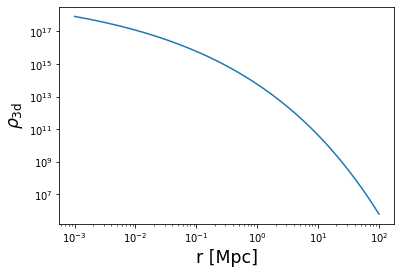

In [65]:
plot_profile(r3d, rho, '$\\rho_{\\rm 3d}$')

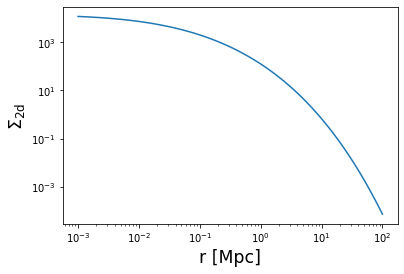

In [66]:
plot_profile(r3d, Sigma, '$\\Sigma_{\\rm 2d}$')

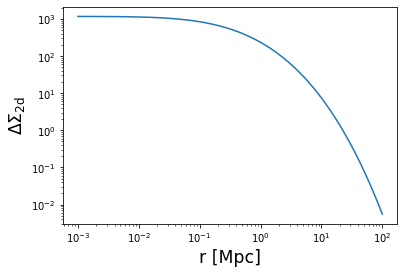

In [67]:
plot_profile(r3d, DeltaSigma, '$\\Delta\\Sigma_{\\rm 2d}$')

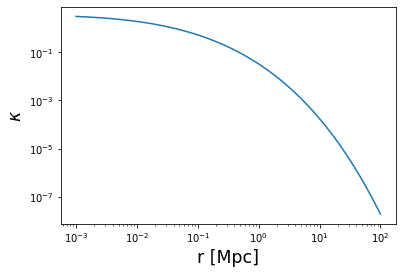

In [68]:
plot_profile(r3d, kappa, '$\\kappa$')

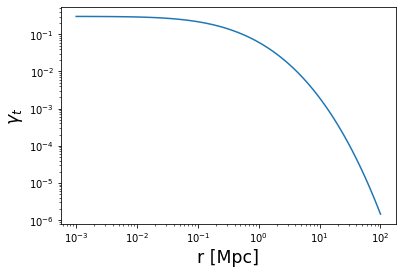

In [69]:
plot_profile(r3d, gammat, '$\\gamma_t$')

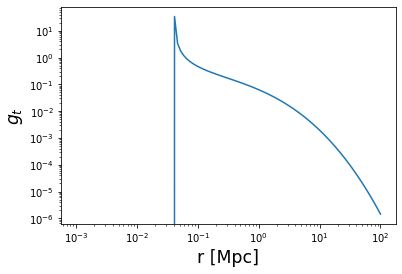

In [70]:
plot_profile(r3d, gt, '$g_t$')

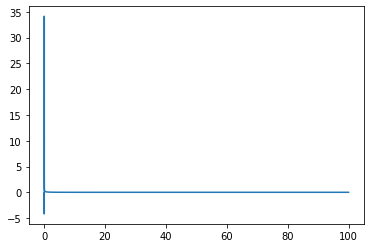

In [71]:
import matplotlib.pyplot as plt
plt.plot(r3d, gammat/(1-kappa))

In [72]:
gt

array([-1.43999800e-01, -1.46689059e-01, -1.49641689e-01, -1.52885548e-01,
       -1.56452360e-01, -1.60378431e-01, -1.64705509e-01, -1.69481878e-01,
       -1.74763692e-01, -1.80616687e-01, -1.87118346e-01, -1.94360681e-01,
       -2.02453854e-01, -2.11530951e-01, -2.21754346e-01, -2.33324331e-01,
       -2.46490962e-01, -2.61570772e-01, -2.78970560e-01, -2.99222361e-01,
       -3.23035998e-01, -3.51380612e-01, -3.85615618e-01, -4.27710061e-01,
       -4.80628745e-01, -5.49054591e-01, -6.40846726e-01, -7.70287369e-01,
       -9.66335671e-01, -1.29801253e+00, -1.98033544e+00, -4.19372994e+00,
        3.41449896e+01,  3.34992728e+00,  1.75556585e+00,  1.18607375e+00,
        8.93105620e-01,  7.14201372e-01,  5.93271398e-01,  5.05784849e-01,
        4.39311694e-01,  3.86881428e-01,  3.44283651e-01,  3.08826671e-01,
        2.78711287e-01,  2.52691238e-01,  2.29878076e-01,  2.09623537e-01,
        1.91445697e-01,  1.74980985e-01,  1.59952022e-01,  1.46145465e-01,
        1.33396342e-01,  